In [26]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score
from sklearn import ensemble

import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("C:/Users/bodak/Desktop/features.csv")
test = pd.read_csv("C:/Users/bodak/Desktop/features_test.csv")
abilities = pd.read_csv("C:/Users/bodak/Desktop/data/dictionaries/abilities.csv")
heroes = pd.read_csv("C:/Users/bodak/Desktop/data/dictionaries/heroes.csv")
items = pd.read_csv("C:/Users/bodak/Desktop/data/dictionaries/items.csv")
lobbies = pd.read_csv("C:/Users/bodak/Desktop/data/dictionaries/lobbies.csv")


y = train['radiant_win']
index = test['match_id']

In [107]:
train.head()

,match_id,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
0,0,1430198770,7,11,5,2098,1489,20,0,0,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1,1430220345,0,42,4,1188,1033,9,0,1,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,2,1430227081,7,33,4,1319,1270,22,0,0,...,4,3,1,13.0,2130,0,0,1830,0,63
3,3,1430263531,1,29,4,1779,1056,14,0,0,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,4,1430282290,7,13,4,1431,1090,8,1,0,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [108]:
#lets see correlation between target and features

corr = train.corr()
Corr = corr['radiant_win'].sort_values(ascending=False).to_frame()
Corr

,radiant_win
radiant_win,1.000000
barracks_status_radiant,0.747048
tower_status_radiant,0.729046
radiant_boots_count,0.119114
first_blood_player2,0.114789
r2_gold,0.099026
r5_gold,0.095127
r1_gold,0.093568
r4_gold,0.093500
dire_tpscroll_count,0.088593


In [3]:
#combine data

na = train.shape[0]
train = train.drop(['radiant_win'], axis = 1)
combine = pd.concat((train, test), sort=False).reset_index(drop=True)

In [4]:
#droping data

combine = combine.drop(['tower_status_radiant'], axis = 1)
combine = combine.drop(['tower_status_dire'], axis = 1)
combine = combine.drop(['barracks_status_radiant'], axis = 1)
combine = combine.drop(['barracks_status_dire'], axis = 1)
combine = combine.drop(['duration'], axis = 1)
combine = combine.drop(['lobby_type'], axis = 1)
combine = combine.drop(['start_time'], axis = 1)
combine = combine.drop(['match_id'], axis = 1)


In [5]:
#looking for amount of missed values for each feature

allna = train.isnull().sum()
allna = allna.drop(allna[allna == 0].index).sort_values(ascending=False)

In [6]:
allna.to_frame()

,0
first_blood_player2,43987
radiant_flying_courier_time,27479
dire_flying_courier_time,26098
first_blood_player1,19553
first_blood_team,19553
first_blood_time,19553
dire_bottle_time,16143
radiant_bottle_time,15691
radiant_first_ward_time,1836
dire_first_ward_time,1826


In [7]:
#filling missing values

combine['first_blood_player2'] = combine['first_blood_player2'].fillna(-1)
combine['radiant_flying_courier_time'] = combine['radiant_flying_courier_time'].fillna(0)
combine['dire_flying_courier_time'] = combine['dire_flying_courier_time'].fillna(0)
combine['first_blood_player1'] = combine['first_blood_player1'].fillna(-1)
combine['first_blood_team'] = combine['first_blood_team'].fillna(-1)
combine['first_blood_time'] = combine['first_blood_time'].fillna(-1)
combine['dire_bottle_time'] = combine['dire_bottle_time'].fillna(0)
combine['radiant_bottle_time'] = combine['radiant_bottle_time'].fillna(0)
combine['radiant_first_ward_time'] = combine['radiant_first_ward_time'].fillna(0)
combine['dire_first_ward_time'] = combine['dire_first_ward_time'].fillna(0)
combine['radiant_courier_time'] = combine['radiant_courier_time'].fillna(0)
combine['dire_courier_time'] = combine['dire_courier_time'].fillna(0)

In [8]:
#feature engineering

combine['r_gold'] = combine['r1_gold'] + combine['r2_gold'] + combine['r3_gold'] + combine['r4_gold'] + combine['r5_gold']
combine['d_gold'] = combine['d1_gold'] + combine['d2_gold'] + combine['d3_gold'] + combine['d4_gold'] + combine['d5_gold']
combine['diff_gold'] = combine['r_gold'] - combine['d_gold']

combine['r_xp'] = combine['r1_xp'] + combine['r2_xp'] + combine['r3_xp'] + combine['r4_xp'] + combine['r5_xp']
combine['d_xp'] = combine['d1_xp'] + combine['d2_xp'] + combine['d3_xp'] + combine['d4_xp'] + combine['d5_xp']
combine['diff_xp'] = combine['r_xp'] - combine['d_xp']

combine['r_lh'] = combine['r1_lh'] + combine['r2_lh'] + combine['r3_lh'] + combine['r4_lh'] + combine['r5_lh']
combine['d_lh'] = combine['d1_lh'] + combine['d2_lh'] + combine['d3_lh'] + combine['d4_lh'] + combine['d5_lh']
combine['diff_lh'] = combine['r_lh'] - combine['d_lh']

combine['r_deaths'] = combine['r1_deaths'] + combine['r2_deaths'] + combine['r3_deaths'] + combine['r4_deaths'] + combine['r5_deaths']
combine['d_deaths'] = combine['d1_deaths'] + combine['d2_deaths'] + combine['d3_deaths'] + combine['d4_deaths'] + combine['d5_deaths']
combine['diff_deaths'] = combine['r_deaths'] - combine['d_deaths']

combine['r_kills'] = combine['r1_kills'] + combine['r2_kills'] + combine['r3_kills'] + combine['r4_kills'] + combine['r5_kills']
combine['d_kills'] = combine['d1_kills'] + combine['d2_kills'] + combine['d3_kills'] + combine['d4_kills'] + combine['d5_kills']
combine['diff_kills'] = combine['r_kills'] - combine['d_kills']

combine['diff_boots'] = combine['radiant_boots_count'] - combine['dire_boots_count']

combine['diff_tpscroll'] = combine['radiant_tpscroll_count'] - combine['dire_tpscroll_count']

combine['diff_bottle'] = combine['radiant_bottle_time'] - combine['dire_bottle_time']

combine['late_r_courier'] = pd.Series(combine['radiant_courier_time'] > 150).astype('int')
combine['early_r_courier'] = pd.Series(combine['radiant_courier_time'] < 150).astype('int')
combine['no_r_courier'] = pd.Series(combine['radiant_courier_time'] == 0).astype('int')
combine['late_d_courier'] = pd.Series(combine['dire_courier_time'] > 150).astype('int')
combine['early_d_courier'] = pd.Series(combine['dire_courier_time'] < 150).astype('int')
combine['no_d_courier'] = pd.Series(combine['dire_courier_time'] == 0).astype('int')

In [115]:
d_heroes = {}
for i in range(len(heroes['id'])):
    d_heroes[heroes['id'][i]] = heroes['name'][i]
    
d_items = {}
for i in range(len(items['id'])):
    d_items[items['id'][i]] = items['name'][i]
    
for column in combine:
        if 'hero' in column:
            combine[column] = combine[column].map(d_heroes)

for column in combine:
        if 'items' in column:
            combine[column] = combine[column].map(d_items)
            


In [9]:
Train = combine[:na]
Test = combine[na:]

x_train, x_test, y_train, y_test = train_test_split(Train, y, test_size = .3, random_state=0)

In [10]:
#scaling data

scaler= RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
X_test= scaler.transform(Test)

kf = KFold(n_splits=5, random_state=42, shuffle=True,)

In [11]:
params = {'n_estimators': 200, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
gbr = ensemble.GradientBoostingClassifier(**params)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)

In [20]:
print('Root Mean Square Error test = ' + str(math.sqrt(mean_squared_error(y_test, y_pred))))
print(r2_score(y_test, y_pred))
roc_auc_score(y_test, y_pred)

Root Mean Square Error test = 0.5884660539200802
-0.387600565766546


0.6525521377947565

In [226]:
scores

array([-0.37699258, -0.37716721, -0.37518366, -0.3784161 , -0.38590949])

In [13]:
predictors = Train.keys()

Text(0, 0.5, 'Feature Importance Score')

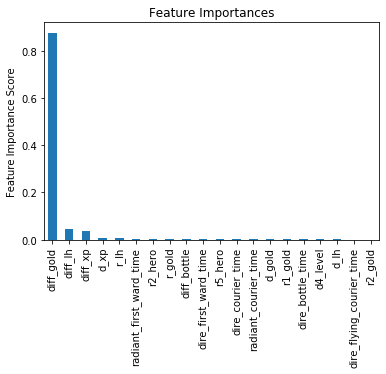

In [14]:
feat_imp = pd.Series(gbr.feature_importances_, predictors).sort_values(ascending=False).head(20)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [404]:
y_subm = gbr.predict_proba(X_test)[:, 1]

In [362]:
combine['radiant_tpscroll_count'].value_counts()

2     24000
3     22873
1     18232
4     17806
5     11503
0      8326
6      6335
7      3137
8      1350
9       546
10      176
11       68
12       39
13        7
16        2
21        1
75        1
14        1
15        1
81        1
18        1
28        1
Name: radiant_tpscroll_count, dtype: int64

In [ ]:
#1000
Root Mean Square Error test = 0.5883203903979793
-0.3869137027996288
#100 depth 2
Root Mean Square Error test = 0.588815499351067
-0.38924903688714796
#100 depth 5
Root Mean Square Error test = 0.5889901443198641
-0.3900732724474487

In [405]:
submission = pd.DataFrame({
        "match_id": index,
        "radiant_win": y_subm })
submission.to_csv('C:/Users/bodak/Desktop/my_submission.csv', index = False)

In [373]:
Test.head()

,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,r2_level,...,diff_xp,late_r_courier,early_r_courier,no_r_courier,late_d_courier,early_d_courier,no_d_courier,diff_boots,diff_tpscroll,diff_bottle
97230,93,4,1103,1089,8,0,1,9,102,3,...,261,0,1,0,0,1,0,-2,-1,-175.0
97231,20,2,556,570,1,0,0,9,6,4,...,10,0,1,0,0,1,0,4,-1,-30.0
97232,112,2,751,808,1,0,0,13,26,2,...,-382,0,1,0,0,1,0,1,4,-13.0
97233,27,3,708,903,1,1,1,11,91,2,...,1656,0,1,0,0,1,0,-2,1,178.0
97234,39,4,1259,661,4,0,0,9,93,5,...,-596,0,1,0,0,1,0,0,0,45.0


In [23]:
Train.head()

,match_id,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
0,0,11,5,2098,1489,20,0,0,7,67,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,1,42,4,1188,1033,9,0,1,12,49,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,2,33,4,1319,1270,22,0,0,12,98,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,3,29,4,1779,1056,14,0,0,5,30,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,4,13,4,1431,1090,8,1,0,8,27,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [52]:
d_items = {}
for i in range(len(items['id'])):
    d_items[items['id'][i]] = items['name'][i]

In [55]:
d_heroes = {}
for i in range(len(heroes['id'])):
    d_heroes[heroes['id'][i]] = heroes['name'][i]

In [56]:
d_heroes

{1: 'antimage',
 2: 'axe',
 3: 'bane',
 4: 'bloodseeker',
 5: 'crystal_maiden',
 6: 'drow_ranger',
 7: 'earthshaker',
 8: 'juggernaut',
 9: 'mirana',
 11: 'nevermore',
 10: 'morphling',
 12: 'phantom_lancer',
 13: 'puck',
 14: 'pudge',
 15: 'razor',
 16: 'sand_king',
 17: 'storm_spirit',
 18: 'sven',
 19: 'tiny',
 20: 'vengefulspirit',
 21: 'windrunner',
 22: 'zuus',
 23: 'kunkka',
 25: 'lina',
 31: 'lich',
 26: 'lion',
 27: 'shadow_shaman',
 28: 'slardar',
 29: 'tidehunter',
 30: 'witch_doctor',
 32: 'riki',
 33: 'enigma',
 34: 'tinker',
 35: 'sniper',
 36: 'necrolyte',
 37: 'warlock',
 38: 'beastmaster',
 39: 'queenofpain',
 40: 'venomancer',
 41: 'faceless_void',
 42: 'skeleton_king',
 43: 'death_prophet',
 44: 'phantom_assassin',
 45: 'pugna',
 46: 'templar_assassin',
 47: 'viper',
 48: 'luna',
 49: 'dragon_knight',
 50: 'dazzle',
 51: 'rattletrap',
 52: 'leshrac',
 53: 'furion',
 54: 'life_stealer',
 55: 'dark_seer',
 56: 'clinkz',
 57: 'omniknight',
 58: 'enchantress',
 59: 'husk

In [58]:
combine['r1_items'].head()

0               javelin
1    ring_of_protection
2    ring_of_protection
3              claymore
4        mithril_hammer
Name: r1_items, dtype: object

In [73]:
for column in combine:
        if 'hero' in column:
            combine[column] = combine[column].map(d_heroes)

In [116]:
cat_features = combine.columns[combine.dtypes == 'object']
for i, col1 in enumerate(cat_features):
    for j, col2 in enumerate(cat_features[i + 1:]):
        combine[col1 + '_' + col2] = combine[col1] + '_' + combine[col2]

In [ ]:
combine_cat_dummies = pd.get_dummies(combine, columns=combine.columns[combine.dtypes == 'object'])

In [105]:
combine_cat_dummies_part, combine_cat_dummies_valid = train_test_split(combine_cat_dummies, test_size=.3, stratify=y, random_state=17)

,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r2_level,r2_xp,r2_gold,r2_lh,...,d5_items_mantle,d5_items_mithril_hammer,d5_items_ogre_axe,d5_items_platemail,d5_items_quarterstaff,d5_items_quelling_blade,d5_items_ring_of_protection,d5_items_robe,d5_items_slippers,d5_items_staff_of_wizardry
0,5,2098,1489,20,0,0,3,842,991,10,...,0,0,0,1,0,0,0,0,0,0
1,4,1188,1033,9,0,1,4,1596,993,10,...,0,0,0,1,0,0,0,0,0,0
2,4,1319,1270,22,0,0,3,1314,775,6,...,0,0,0,0,0,0,0,0,0,0
3,4,1779,1056,14,0,0,2,539,539,1,...,0,0,0,0,0,0,0,0,0,0
4,4,1431,1090,8,1,0,2,629,552,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
logit = LogisticRegression(random_state=17)

In [17]:
logit.fit(x_train, y_train)

C:\Users\bodak\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=17, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred_logit = logit.predict(x_test)


In [24]:
roc_auc_score(y_test, y_pred_logit)

0.6528307189024434

In [27]:
forest = RandomForestClassifier(n_estimators = 1000, max_depth=4)

In [28]:
forest.fit(x_train, y_train)
y_pred_forest = forest.predict(x_test)
roc_auc_score(y_test, y_pred_forest)

0.6507330776900438